In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'nuveprogcpbilling-searce' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=nuveprogcpbilling-searce:US:bquxjob_1984458b_188b5153fd7)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_3638741b_188b52f8642') # Job ID inserted based on the query results selected to explore
print(job.query)

select project.id,cost,service.description,usage_end_time,export_time,DATETIME_DIFF(DATETIME ((export_time)),DATETIME (usage_end_time), DAY) as days_dif from `nuveprogcpbilling-searce.DetailedUsageCostData.gcp_billing_export_resource_v1_016062_CB70A2_51D75E` where cost>0 and DATETIME_DIFF(DATETIME ((export_time)),DATETIME (usage_end_time), DAY)>0 order by days_dif desc;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_3638741b_188b52f8642') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,id,cost,description,usage_end_time,export_time,days_dif
0,warpengine-dev,0.000817,Cloud Storage,2023-05-02 19:00:00+00:00,2023-05-27 10:06:36.735478+00:00,25
1,keyskills-1635748856769,5.544815,Cloud Storage,2021-11-08 06:00:00+00:00,2021-11-25 01:38:27.526000+00:00,17
2,keyskills-1635748861190,3.136097,Cloud Storage,2021-11-08 06:00:00+00:00,2021-11-25 01:38:27.526000+00:00,17
3,keyskills-1635748856312,0.741634,Cloud Storage,2021-11-08 06:00:00+00:00,2021-11-25 01:38:27.526000+00:00,17
4,keyskills-1635748865204,0.637723,Cloud Storage,2021-11-08 06:00:00+00:00,2021-11-25 01:38:27.526000+00:00,17
...,...,...,...,...,...,...
1050418,manipalpr-1650863413773,1.899812,Compute Engine,2022-04-29 09:00:00+00:00,2022-04-30 02:39:31.743000+00:00,1
1050419,keyskills-1650563423375,2.843132,Compute Engine,2022-04-29 11:00:00+00:00,2022-04-30 02:39:31.743000+00:00,1
1050420,keyskills-1650563423375,3.495655,Compute Engine,2022-04-29 10:00:00+00:00,2022-04-30 02:39:31.743000+00:00,1
1050421,keyskills-1650563423375,3.495654,Compute Engine,2022-04-29 09:00:00+00:00,2022-04-30 02:39:31.743000+00:00,1


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
results.describe()

,cost,days_dif
count,1.050423e+06,1050423.0
mean,2.072615e+00,1.373407
std,6.486133e+01,0.70228
min,1.000000e-06,1.0
25%,3.061000e-03,1.0
50%,1.263390e-01,1.0
75%,5.048240e-01,2.0
max,2.363587e+04,25.0


##Histogram in percentage

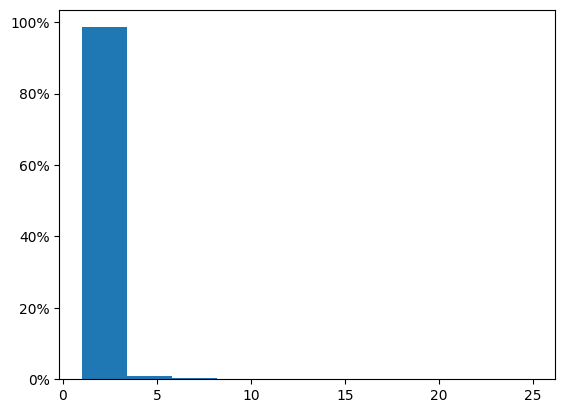

In [6]:
#create histogram, using percentages instead of counts
plt.hist(results['days_dif'], weights=np.ones(len(results)) / len(results))

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

##Count plot

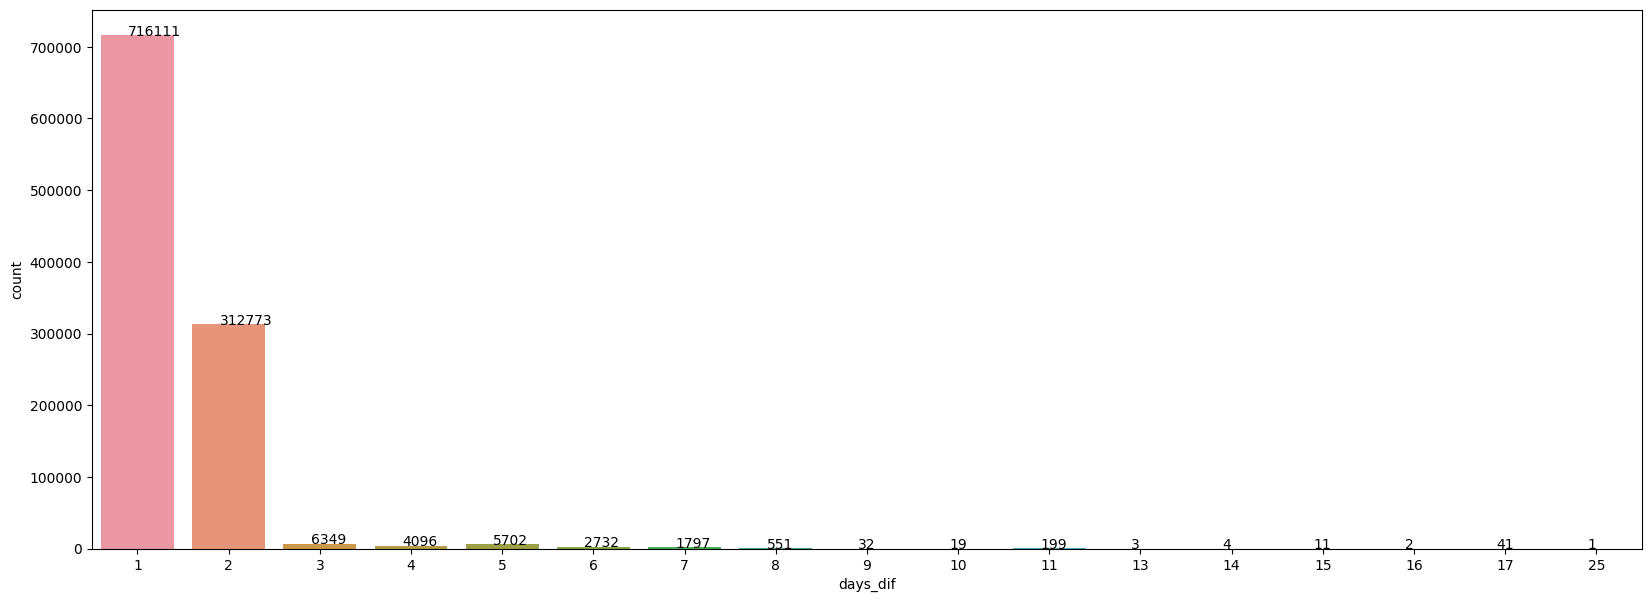

In [7]:
plt.figure(figsize=(20,7))
plt.xlim(0,30)

ax=sns.countplot(data= results, x= 'days_dif');
for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = int(p.get_height())
  ax.annotate('{}'.format(value), (p.get_x()+0.3, p.get_height()+0.01))

#Analyse the disctibution from 3 to 25

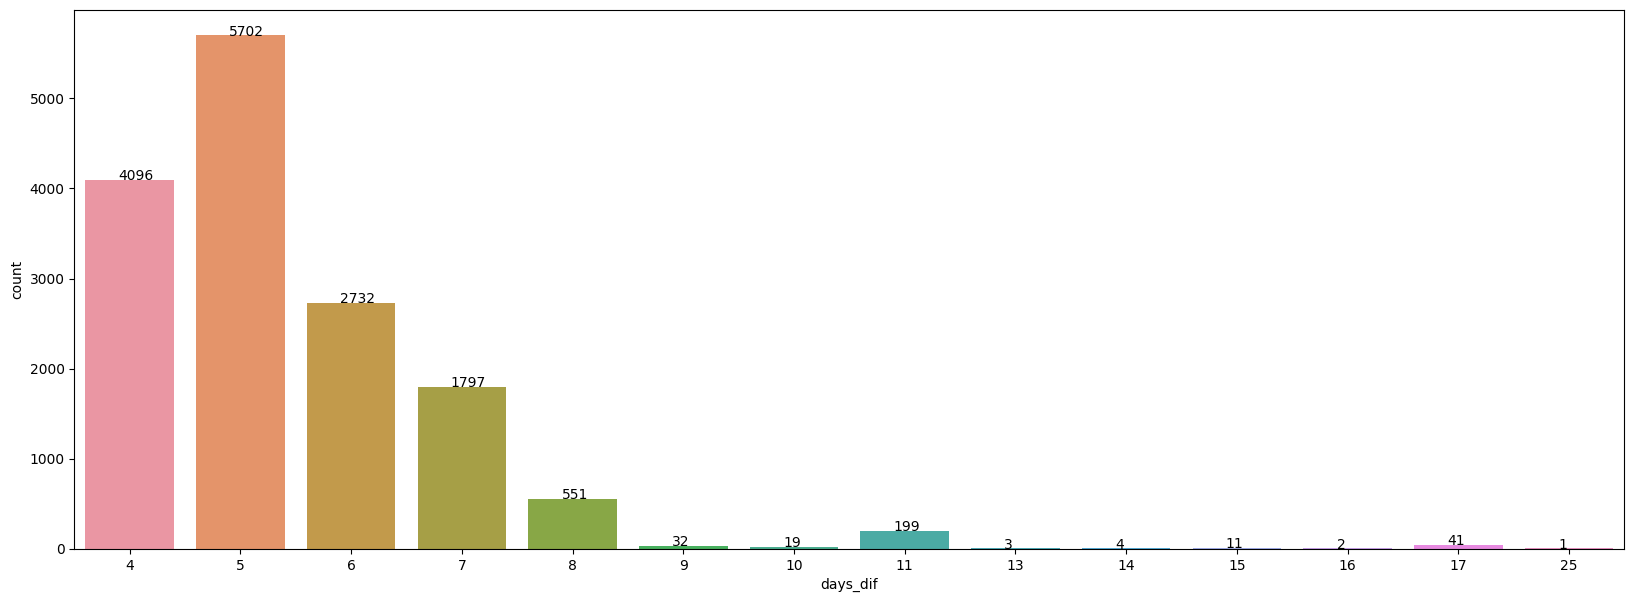

In [8]:
dfFrom3to25 = results.loc[results['days_dif'] > 3]
plt.figure(figsize=(20,7))
plt.xlim(0,30)
# sns.histplot(data=results,x='days_dif');

ax=sns.countplot(data=dfFrom3to25, x= 'days_dif');
for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = int(p.get_height())
  ax.annotate('{}'.format(value), (p.get_x()+0.3, p.get_height()+0.01))

##Countplot for days greater than 10 with resource type

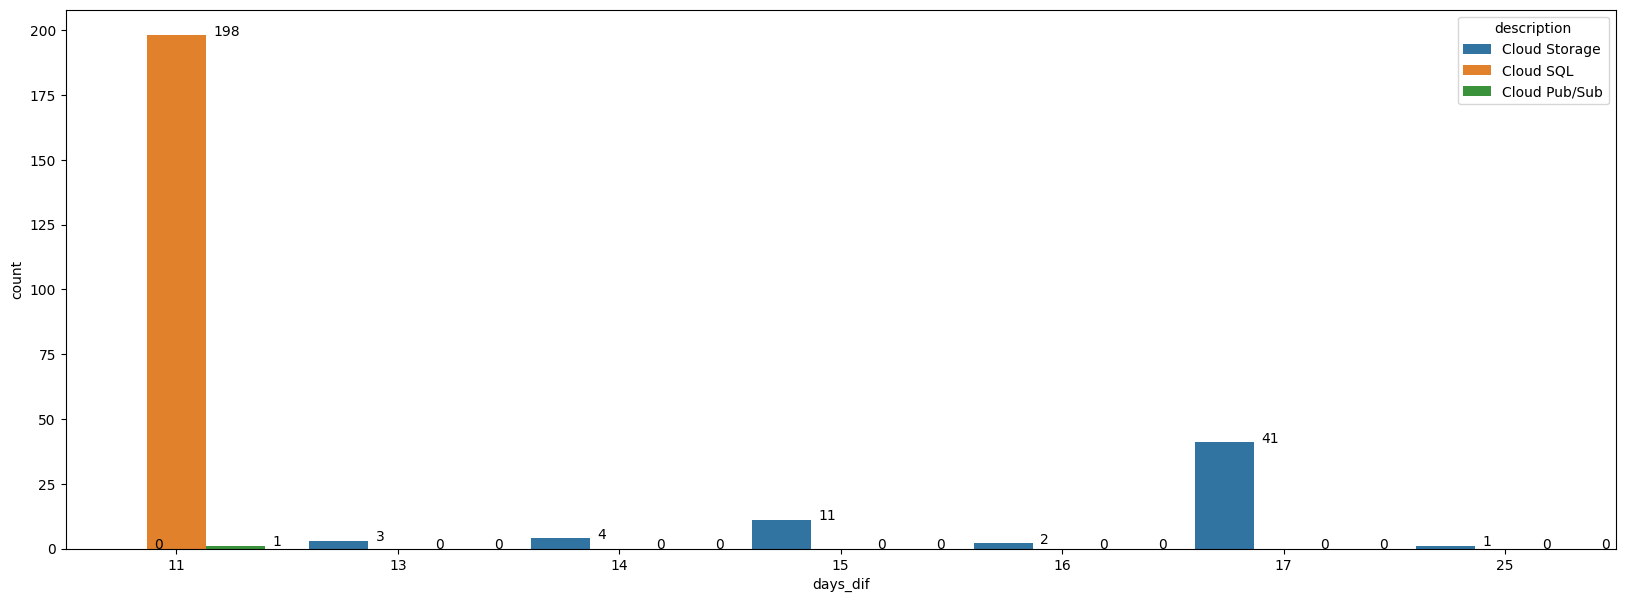

In [9]:
dfFrom3to25 = results.loc[results['days_dif'] > 10]
plt.figure(figsize=(20,7))
plt.xlim(0,30)
# sns.histplot(data=results,x='days_dif');

ax=sns.countplot(data=dfFrom3to25, x= 'days_dif',hue='description');
for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = int(p.get_height())
  ax.annotate('{}'.format(value), (p.get_x()+0.3, p.get_height()+0.01))

##Confidence level using box plot

<Axes: xlabel='days_dif'>

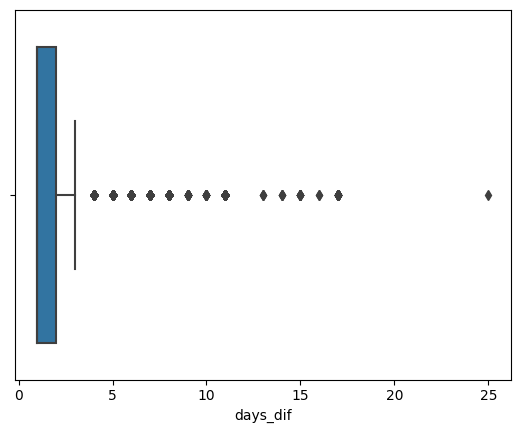

In [10]:
sns.boxplot(data=results,x='days_dif')

In [11]:
results.days_dif.describe()

count    1050423.0
mean      1.373407
std        0.70228
min            1.0
25%            1.0
50%            1.0
75%            2.0
max           25.0
Name: days_dif, dtype: Float64

In [12]:
percentage=75
th=np.percentile(results.days_dif,percentage)
print('Thresould to cover {}% is {}'.format(percentage,th))

Thresould to cover 75% is 2.0


##Analyse of cost Lekage

In [45]:
def show_cost_insight(percentage,df,year):

  df_category=df
  df_category['year'] = [x.year for x in df_category['usage_end_time']]

  df_final = df_category[df_category['year']==year]
  start_date=df_final.usage_end_time.min()
  end_date=df_final.usage_end_time.max()
  total =df_final['cost'].sum()
  th=np.percentile(df_final.days_dif,percentage)
  df_final['category'] = ['Captured' if x <=th else 'Lekage' for x in df_final['days_dif']]

  def fmt(x):
      return '{:.0f} Rs'.format(total*x/100)

  x=df_final.groupby(['category']).sum()['cost'];
  plt.figure(figsize=(7,5))
  plt.pie(x,labels=x.keys(),autopct=fmt);
  plt.legend(loc='upper right');
  plt.title('Captured vs Leakage \nYear : {}\nThresshold : {}\nTotal cost : {}\nConfidence level: {}'.format(year,th,total,percentage));

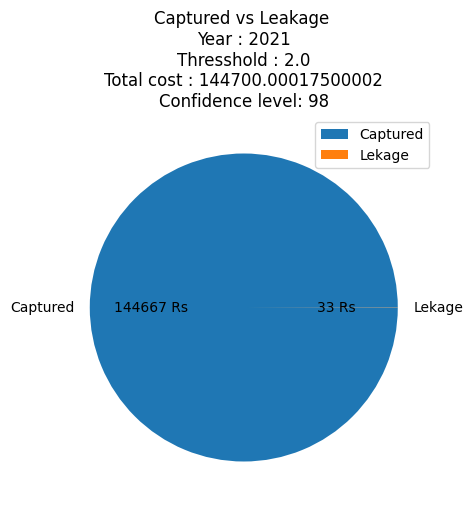

In [73]:
# th=75
# th=85
# th=97
th=98
# th=99.9
show_cost_insight(th,results,2021)

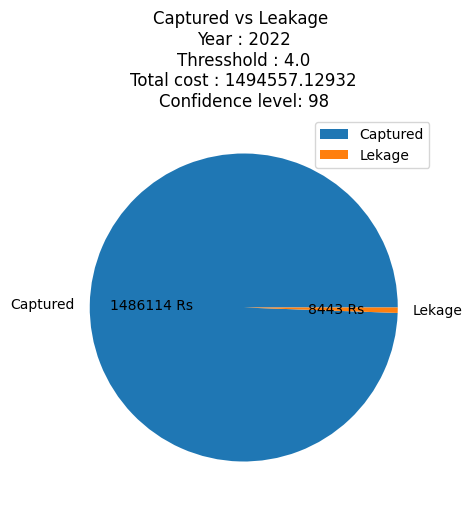

In [74]:
show_cost_insight(th,results,2022)

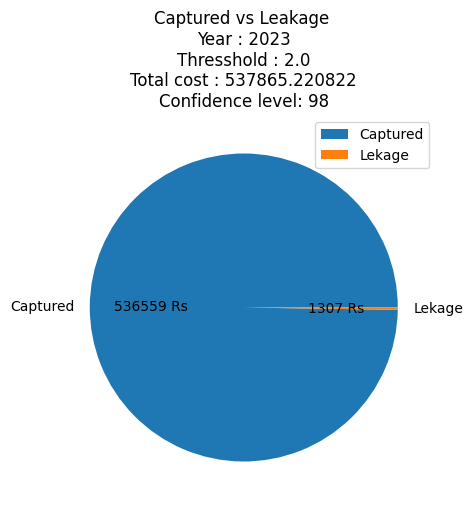

In [75]:
show_cost_insight(th,results,2023)